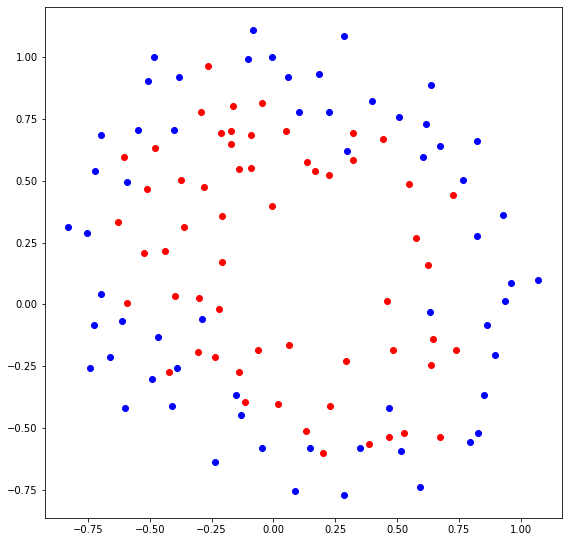

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

x_data = pointX
y_data = pointY
l_data = label

plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [2]:
def g(x,y,theta):
    sum = 0
    for i in range(len(theta)):
        for j in range(len(theta[0])):
            sum += theta[i][j]*(x**i)*(y**j)
    return sum

def dg_dtheta(x,y,i,j):
    return ((x**i) * (y**j))

def sigmoid(z):
    return 1/(1+np.exp(-z))

def j1(x,y,l,theta):
    total = 0
    if l == 1:
        total = - np.log10(sigmoid(g(x,y,theta)))
    if l == 0:
        total = - np.log10(1 - sigmoid(g(x,y,theta)))
    return total

def sumtheta2(theta):
    sum = 0
    for i in range(len(theta)):
        for j in range(len(theta[0])):
            sum += theta[i][j]**2
    return sum

print('function defined!')

function defined!


In [37]:

col1 = []
col_accurate1 = []
theta = np.ones([10,10]).tolist()
m = len(x_data)
alpha = 0.1
lbda = 0

for iteration in range(1000):

    for ii in range(len(theta)):
        for jj in range(len(theta[0])):
            sum1m = 0
            for i in range(m):
                sum1m += (sigmoid(g(x_data[i],y_data[i],theta)) - l_data[i]) *dg_dtheta(x_data[i],y_data[i],ii,jj)
            total = sum1m + lbda*theta[ii][jj]
            theta[ii][jj] = theta[ii][jj] - alpha*total/m
    
    sumj = 0
    for i in range(m):
        sumj += j1(x_data[i],y_data[i],l_data[i],theta)
        
    if(np.mod(iteration,100) == 0):
        print(iteration, sumj/m + lbda/2*sumtheta2(theta))
    
    col1.append(sumj/m + lbda/2*sumtheta2(theta))

    c_blue = 0
    c_red = 0
    
    for i in range(m):
        if g(x_data[i], y_data[i],theta) > 0:
            if label[i] == 0:
                c_blue += 1     
        if g(x_data[i], y_data[i],theta) < 0:
            if label[i] == 1:
                c_red += 1
    
    col_accurate1.append((m-c_blue-c_red)/m)

print('Train completed!')


Train completed!


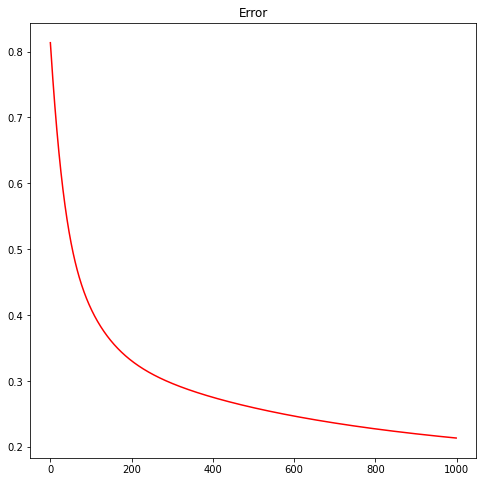

In [17]:
plt.figure(figsize=(8, 8))
plt.plot(col1,c='r')
plt.title('Error')
plt.grid()
plt.ylabel('error')
plt.xlabel('iteration')
plt.show()


The final accuracy: 0.8220 


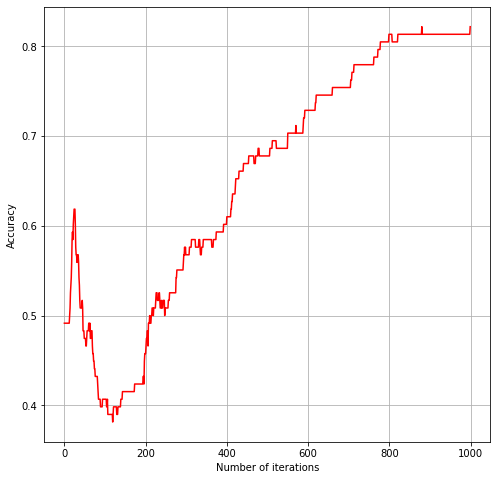

In [18]:
accurate = (m-c_blue-c_red)/m
print('The final accuracy: %.4f ' % accurate)

plt.figure(figsize=(8, 8))
plt.plot(col_accurate1,c='r')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.grid()
plt.show()

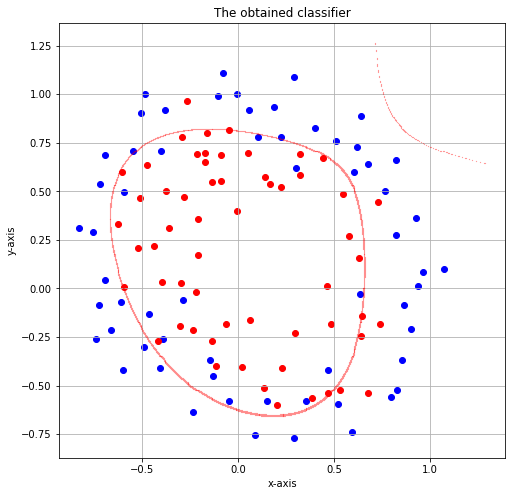

In [24]:
xx = yy = np.arange(-1, 1.3, 0.005)
X1 = []; Y1 = []

for i in xx:
    for j in yy:
        if g(i, j, theta) > -0.02 and g(i, j, theta) < 0.02 :
            X1.append(i)
            Y1.append(j)

plt.figure(figsize=(8, 8))
plt.plot(X1, Y1, marker='.', c='r', linewidth=0, markersize=0.3)

plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')

plt.title('The obtained classifier')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.show()

In [38]:
col2 = []
col_accurate2 = []
theta = np.ones([6,6]).tolist()
m = len(x_data)
alpha = 0.05
lbda = 0.1

for iteration in range(1000):

    for ii in range(len(theta)):
        for jj in range(len(theta[0])):
            sum1m = 0
            for i in range(m):
                sum1m += (sigmoid(g(x_data[i],y_data[i],theta)) - l_data[i])*dg_dtheta(x_data[i],y_data[i],ii,jj)
            total = sum1m + lbda*theta[ii][jj]
            theta[ii][jj] = theta[ii][jj] - alpha*total/m

    sumj = 0
    for i in range(m):
        sumj += j1(x_data[i],y_data[i],l_data[i],theta)
        
    if(np.mod(iteration,100) == 0):
        print(iteration, sumj/m + lbda/2*sumtheta2(theta))
    
    col2.append(sumj/m + lbda/2*sumtheta2(theta))
    
    c_blue = 0
    c_red = 0
    
    for i in range(m):
        if g(x_data[i], y_data[i],theta) > 0:
            if label[i] == 0:
                c_blue += 1     
        if g(x_data[i], y_data[i],theta) < 0:
            if label[i] == 1:
                c_red += 1
    
    col_accurate2.append((m-c_blue-c_red)/m)
    
print('Train completed!')

Train completed!


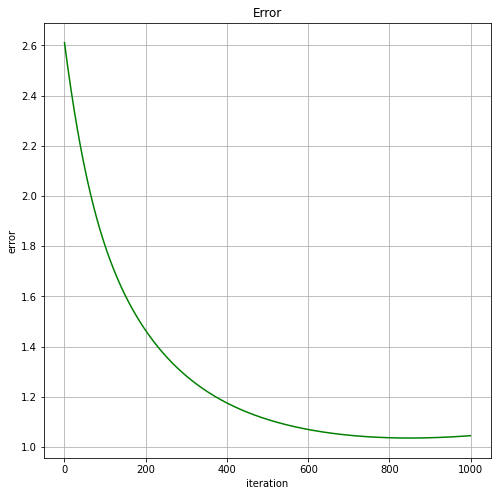

In [29]:
plt.figure(figsize=(8, 8))
plt.plot(col2,c='g')
plt.title('Error')
plt.ylabel('error')
plt.xlabel('iteration')
plt.grid()
plt.show()

The final accuracy: 0.6949 


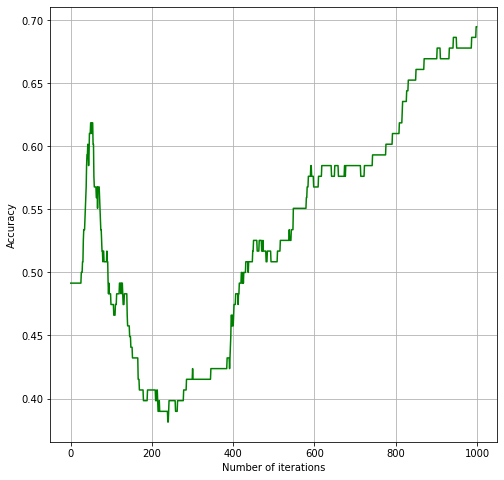

In [30]:
accurate2 = (m-c_blue-c_red)/m
print('The final accuracy: %.4f ' % accurate2)

plt.figure(figsize=(10, 10))
plt.plot(col_accurate2,c='g')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

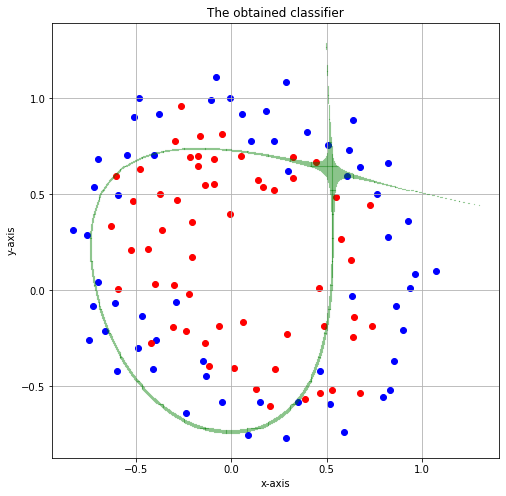

In [32]:
xx = yy = np.arange(-1, 1.3, 0.005)
X1 = []; Y1 = []

for i in xx:
    for j in yy:
        if g(i, j, theta) > -0.01 and g(i, j, theta) < 0.02 :
            X1.append(i)
            Y1.append(j)

plt.figure(figsize=(8, 8))
plt.plot(X1, Y1, marker='.', c='g', linewidth=0, markersize=0.3)

plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')

plt.title('The obtained classifier')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.show()

In [39]:
col3 = []
col_accurate3 = []
theta = np.ones([10,10]).tolist()
m = len(x_data)
alpha = 0.05
lbda = 1

for iteration in range(1000):

    for ii in range(len(theta)):
        for jj in range(len(theta[0])):
            sum1m = 0
            for i in range(m):
                sum1m += (sigmoid(g(x_data[i],y_data[i],theta)) - l_data[i]) * dg_dtheta(x_data[i],y_data[i],ii,jj)
            total = sum1m + lbda*theta[ii][jj]
            theta[ii][jj] = theta[ii][jj] - alpha*total/m

    sumj = 0
    for i in range(m):
        sumj += j1(x_data[i],y_data[i],l_data[i],theta)
        
    if(np.mod(iteration,100) == 0):
        print(iteration, sumj/m + lbda/2*sumtheta2(theta))
    
    col3.append(sumj/m + lbda/2*sumtheta2(theta))

    c_blue = 0
    c_red = 0
    
    for i in range(m):
        if g(x_data[i], y_data[i],theta) > 0:
            if label[i] == 0:
                c_blue += 1     
        if g(x_data[i], y_data[i],theta) < 0:
            if label[i] == 1:
                c_red += 1
    
    col_accurate3.append((m-c_blue-c_red)/m)

print('Train completed!')


Train completed!


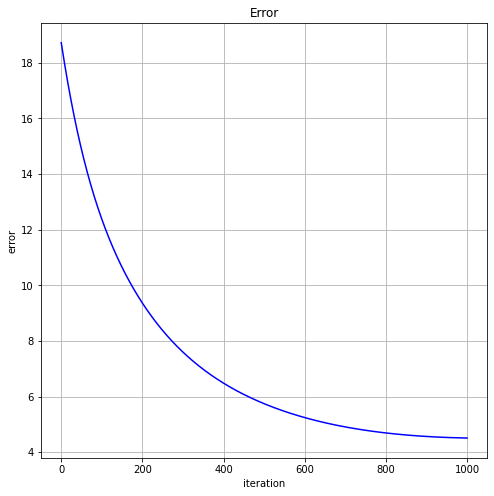

In [34]:
plt.figure(figsize=(8, 8))
plt.plot(col3,c='b')
plt.title('Error')
plt.ylabel('error')
plt.xlabel('iteration')
plt.grid()
plt.show()

The final accuracy: 0.7119 


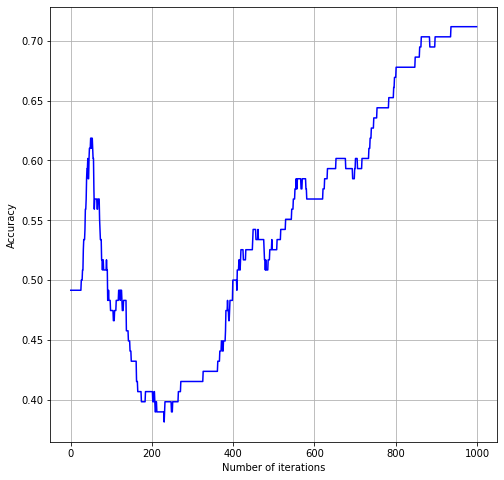

In [35]:
accurate3 = (m-c_blue-c_red)/m
print('The final accuracy: %.4f ' % accurate3)

plt.figure(figsize=(8, 8))
plt.plot(col_accurate3,c='b')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

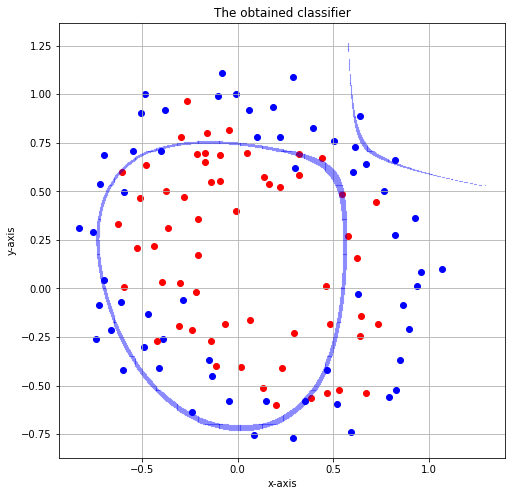

In [36]:
xx = yy = np.arange(-1, 1.3, 0.005)
X1 = []; Y1 = []

for i in xx:
    for j in yy:
        if g(i, j, theta) > -0.02 and g(i, j, theta) < 0.02 :
            X1.append(i)
            Y1.append(j)

plt.figure(figsize=(8, 8))
plt.plot(X1, Y1, marker='.', c='b', linewidth=0, markersize=0.3)

plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')

plt.title('The obtained classifier')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.show()